In [1]:

from data_preprocessing.dataloader import loading_data

import argparse

parser = argparse.ArgumentParser()

parser.add_argument('--padding', type=str, 
                    default='mean', help='choose one of them : no, max, mean')
parser.add_argument('--timespan', type=int, 
                    default=10000, help='choose of the number of timespan between data points(1000 = 1sec, 60000 = 1min)')
parser.add_argument('--min_seq', type=int, 
                    default=10, help='choose of the minimum number of data points in a example')
parser.add_argument('--min_samples', type=int, default=20, 
                    help='choose of the minimum number of samples in each label')
parser.add_argument('--selected_dataset', default='lapras', type=str,
                    help='Dataset of choice: lapras, casas, opportunity, aras_a, aras_b')
parser.add_argument('--aug_method', type=str, default='AddNoise', help='choose the data augmentation method')
parser.add_argument('--aug_wise', type=str, default='Temporal', help='choose the data augmentation wise')

parser.add_argument('--test_ratio', type=float, default=0.3, help='choose the number of test ratio')

args = parser.parse_args(args=[])

data_type = args.selected_dataset

num_classes, datalist, labellist = loading_data(data_type, args)

print(datalist.shape)



Loading Lapras Dataset--------------------------------------
['Seat Occupy', 'Sound', 'Brightness', 'Light', 'Existence', 'Projector', 'Presentation']
Loading Lapras Dataset Finished--------------------------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
original label: [1, 2, 3, 4] 
changed label: [1, 2, 3, 4]
Augmentation Starting-------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
The amount of augmented data: [10, 77, 89, 0]
Before padding-----------------
types_label : [1, 2, 3, 4]
count_label : [258, 258, 258, 258]
sum of # episodes: 1032
mean padding (length): 598
After padding-----------------
types_label : [0, 1, 2, 3]
count_label : [258, 258, 258, 258]
sum of # episodes: 1032
torch.Size([1032, 598, 7])


[-391.78802 -290.315   -259.6139  -300.5     -392.234   -399.
 -399.     ]


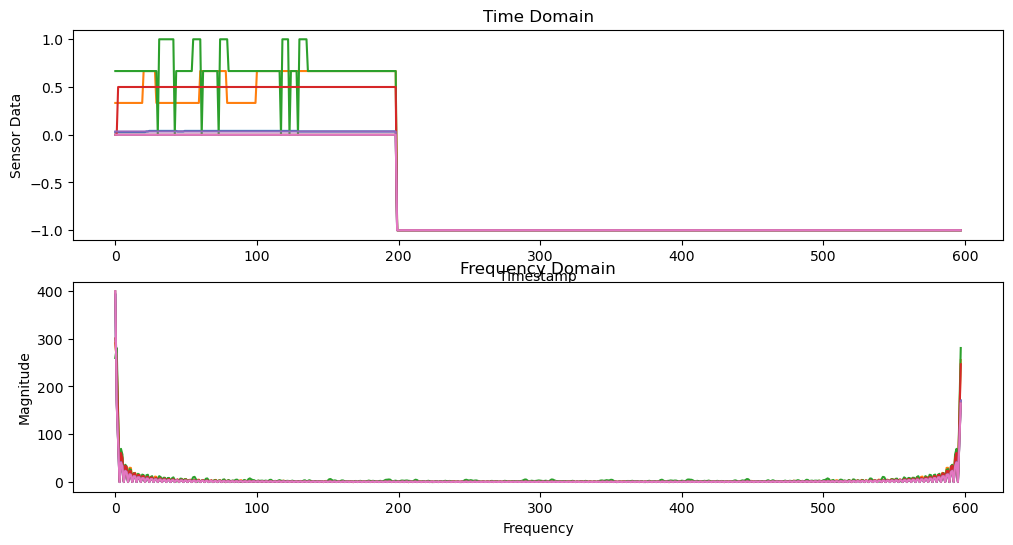

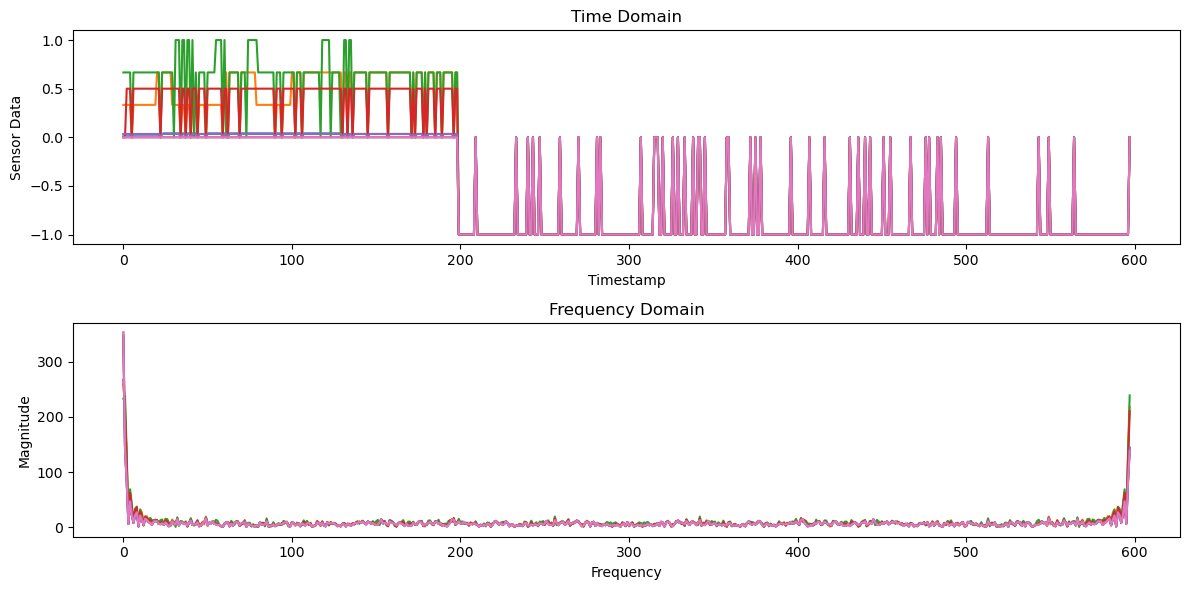

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *

# 입력 데이터 생성
input_data = datalist[10][:598,:].cpu().numpy()  # 600개의 타임스탬프와 7개의 멀티 센서 데이터

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(input_data)
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

# 주파수 도메인 변환
freq_data = np.fft.fft((input_data), axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

# activation count
activ_data = np.sum(input_data, axis=0)
print(activ_data)


# Augmentation
# 
#my_aug =  Pool(kind='max',size=4)
a_data = input_data
my_aug = (Dropout(p=0.1,fill=0)) 
#my_aug = (AddNoise(scale=0.1))
aug = my_aug.augment(np.reshape(a_data,(1, a_data.shape[0], -1)))
modified_data = np.concatenate((aug[0], input_data[126:, :]), axis=0)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(modified_data])
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")


# 주파수 도메인 변환
freq_data = np.fft.fft(aug[0], axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.tight_layout()
plt.show()